<a href="https://colab.research.google.com/github/AnshSheravia1/Experiments/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import plotly.express as px
import seaborn as sns

In [207]:
df = pd.read_csv("The Goldman Sachs.csv")
df2 = pd.read_csv("JPMorgan Chase.csv")

### **Goldman Sachs**

In [208]:
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2000-01-03   94.187500   94.375000   87.750000   88.312500   65.690536   
1     2000-01-04   87.000000   87.500000   82.250000   82.750000   61.552921   
2     2000-01-05   80.875000   81.875000   78.375000   78.875000   58.670509   
3     2000-01-06   78.625000   84.500000   78.625000   82.250000   61.180992   
4     2000-01-07   83.062500   83.187500   79.875000   82.562500   61.413429   
...          ...         ...         ...         ...         ...         ...   
5858  2023-04-17  336.000000  340.450012  333.679993  339.679993  339.679993   
5859  2023-04-18  328.000000  336.549988  326.130005  333.910004  333.910004   
5860  2023-04-19  332.980011  336.989990  331.670013  336.890015  336.890015   
5861  2023-04-20  334.950012  339.309998  334.320007  338.709991  338.709991   
5862  2023-04-21  339.000000  342.359985  336.000000  341.660004  341.660004   

       Volume  
0     1822600  
1     1

In [209]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-210-67184a834d0c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



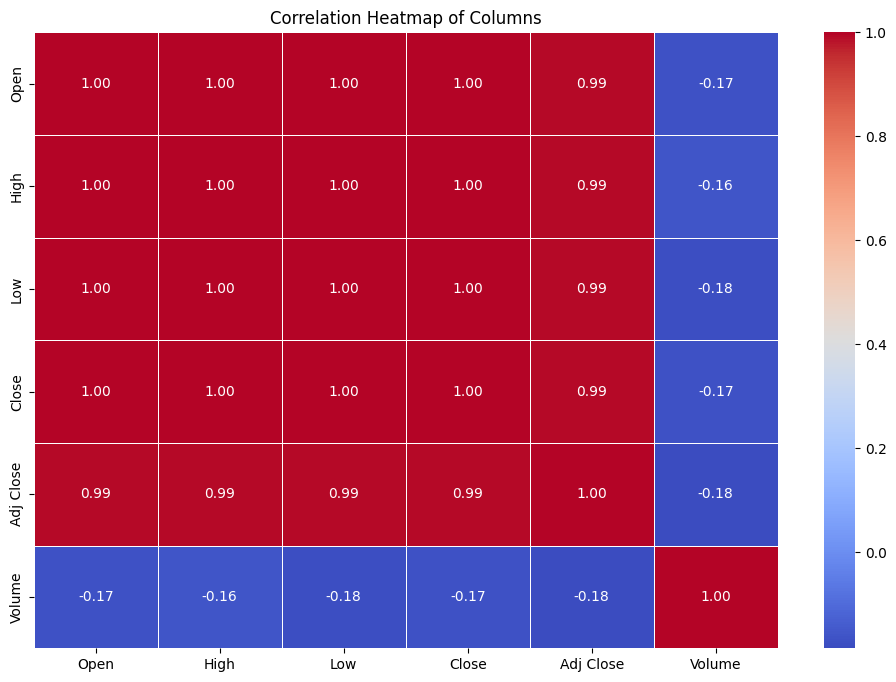

In [210]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Columns')
plt.show()

In [211]:
#Close and Adjusted Close prices
fig = px.line(df, x='Date', y=['Close', 'Adj Close'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [212]:
#Open and Close prices
fig = px.line(df, x='Date', y=['Open', 'Close'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [213]:
#High and Low prices
fig = px.line(df, x='Date', y=['High', 'Low'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [215]:
#Selecting feature and target variable
X = df[['Close', 'Volume', 'Open', 'High', 'Low']]
y = df['Adj Close']

In [216]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [218]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 64.28605559582327


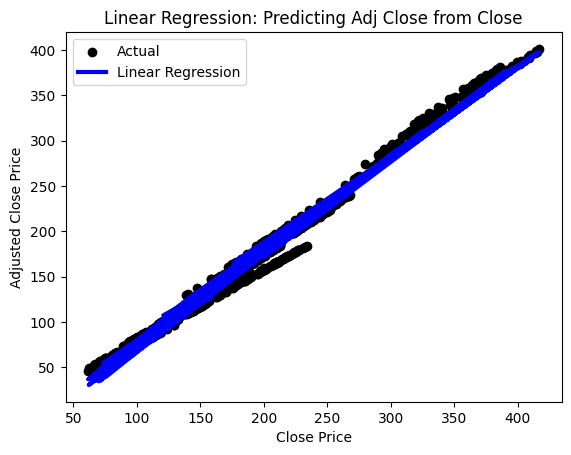

In [219]:
# Visualize the results
plt.scatter(X_test['Close'], y_test, color='black', label='Actual')
plt.plot(X_test['Close'], y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.xlabel('Close Price')
plt.ylabel('Adjusted Close Price')
plt.title('Linear Regression: Predicting Adj Close from Close')
plt.legend()
plt.show()

In [220]:
# Polynomial Regression with Ridge regularization
degree = 8
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=0.01))
model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])

In [221]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 24.28879922466033


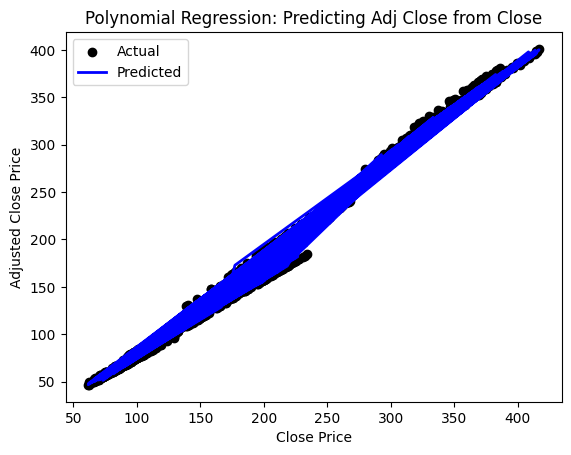

In [222]:
# Visualize the results
plt.scatter(X_test['Close'], y_test, color='black', label='Actual')
plt.plot(X_test['Close'], y_pred, color='blue', linewidth=2, label='Predicted')
plt.xlabel('Close Price')
plt.ylabel('Adjusted Close Price')
plt.title('Polynomial Regression: Predicting Adj Close from Close')
plt.legend()
plt.show()

In [262]:
#Taking dummy values to experiment
new_data = {
    'Close': [105, 110, 95, 98, 102],
    'Volume': [150000, 200000, 120000, 180000, 160000],
    'Open': [100, 105, 92, 97, 99],
    'High': [108, 115, 98, 101, 105],
    'Low': [98, 105, 90, 94, 97]
}

In [263]:
new_df = pd.DataFrame(new_data)

In [264]:
predicted_adj_close = model.predict(new_df[['Close', 'Volume','Open', 'High', 'Low']])
print("Predicted Adjusted Close Prices:")
print(predicted_adj_close)

Predicted Adjusted Close Prices:
[76.43956444 86.35504556 59.65722682 68.10291356 73.055232  ]


In [265]:
new_df['Predicted Adj Close'] = model.predict(new_df[['Close', 'Volume', 'Open', 'High', 'Low']])

In [266]:
df['Dividends'] = df['Adj Close'] * (1 - df['Adj Close'].shift(1) / df['Close'])

In [267]:
print(df[['Dividends', 'Close', 'Adj Close']])

      Dividends       Close   Adj Close
0           NaN   88.312500   65.690536
1     12.689545   82.750000   61.552921
2     12.884884   78.875000   58.670509
3     17.539412   82.250000   61.180992
4     15.904457   82.562500   61.413429
...         ...         ...         ...
5858   2.759980  339.679993  339.679993
5859  -5.769989  333.910004  333.910004
5860   2.980011  336.890015  336.890015
5861   1.819976  338.709991  338.709991
5862   2.950013  341.660004  341.660004

[5863 rows x 3 columns]


In [268]:
new_df['Predicted Dividends'] = new_df['Predicted Adj Close'] * (1 - new_df['Predicted Adj Close'].shift(1) / new_df['Close'])

In [269]:
print(new_df)

   Close  Volume  Open  High  Low  Predicted Adj Close  Predicted Dividends
0    105  150000   100   108   98            76.439564                  NaN
1    110  200000   105   115  105            86.355046            26.346481
2     95  120000    92    98   90            59.657227             5.428779
3     98  180000    97   101   94            68.102914            26.645455
4    102  160000    99   105   97            73.055232            24.278034


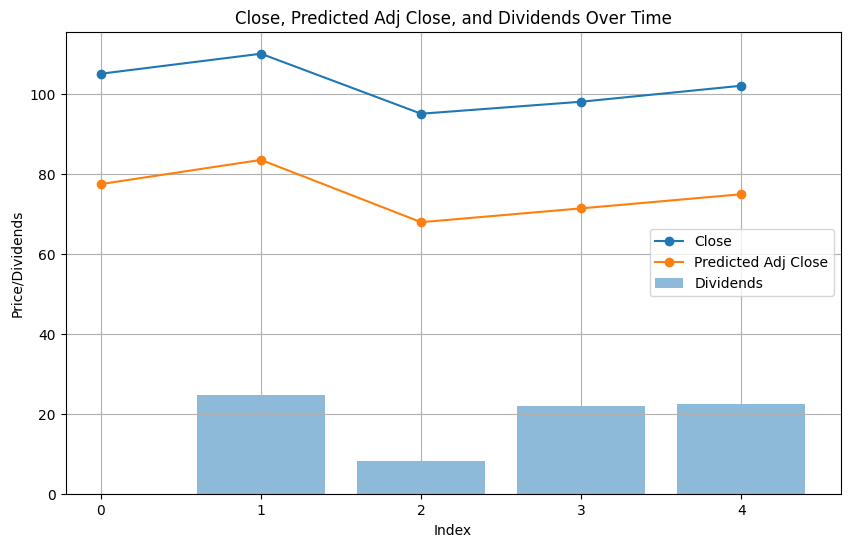

In [231]:
plt.figure(figsize=(10, 6))

plt.plot(new_df['Close'], label='Close', marker='o')
plt.plot(new_df['Predicted Adj Close'], label='Predicted Adj Close', marker='o')
plt.bar(new_df.index, new_df['Dividends'], label='Dividends', alpha=0.5)


plt.xlabel('Index')
plt.ylabel('Price/Dividends')
plt.title('Close, Predicted Adj Close, and Dividends Over Time')
plt.legend()
plt.grid(True)
plt.show()

### **JPMorgan Chase**


In [232]:
print(df2)

            Date        Open        High         Low       Close   Adj Close  \
0     2000-01-03   49.833332   50.250000   48.083332   48.583332   24.406227   
1     2000-01-04   47.083332   47.458332   46.125000   47.250000   23.870712   
2     2000-01-05   46.833332   48.375000   46.000000   46.958332   23.723372   
3     2000-01-06   46.750000   48.625000   46.500000   47.625000   24.060173   
4     2000-01-07   48.416668   49.000000   47.333332   48.500000   24.502220   
...          ...         ...         ...         ...         ...         ...   
5858  2023-04-17  139.949997  140.059998  137.660004  139.830002  139.830002   
5859  2023-04-18  140.270004  141.779999  139.029999  141.399994  141.399994   
5860  2023-04-19  141.229996  141.500000  140.399994  141.220001  141.220001   
5861  2023-04-20  139.910004  141.429993  139.839996  140.809998  140.809998   
5862  2023-04-21  139.740005  141.110001  138.779999  140.539993  140.539993   

        Volume  
0     12019200  
1    

In [233]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [234]:
#Close and Adjusted Close prices
fig = px.line(df2, x='Date', y=['Close', 'Adj Close'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [235]:
#Open and Close prices
fig = px.line(df2, x='Date', y=['Open', 'Close'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [236]:
#High and Low prices
fig = px.line(df, x='Date', y=['High', 'Low'],
              labels={'value': 'Price', 'variable': 'Price Type'},
              title='Stock Prices Over Time',
              line_shape='linear')

# Customize the layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.update_layout(xaxis_rangeslider_visible=False)

# Show the plot
fig.show()

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [238]:
#Selecting feature and target variable
X = df2[['Close', 'Volume','Open','High','Low']]
y = df2['Adj Close']

In [239]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
# Polynomial Regression with Ridge regularization
degree = 9
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=0.08))
model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.08))])

In [241]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.584652470115743


In [242]:
df2['Dividends'] = df2['Adj Close'] * (1 - df2['Adj Close'].shift(1) / df2['Close'])

In [243]:
#Taking dummy values to experiment
new_data = {
    'Close': [105, 110, 95, 98, 102],
    'Volume': [150000, 200000, 120000, 180000, 160000],
    'Open': [100, 105, 92, 97, 99],
    'High': [108, 115, 98, 101, 105],
    'Low': [98, 105, 90, 94, 97]
}

In [244]:
new_df2 = pd.DataFrame(new_data)

In [245]:
#Predicted Adjusted Close
predicted_adj_close = model.predict(new_df2[['Close', 'Volume','Open', 'High', 'Low']])
print("Predicted Adjusted Close Prices:")
print(predicted_adj_close)
new_df2['Predicted Adj Close'] = predicted_adj_close

Predicted Adjusted Close Prices:
[76.43956444 86.35504556 59.65722682 68.10291356 73.055232  ]


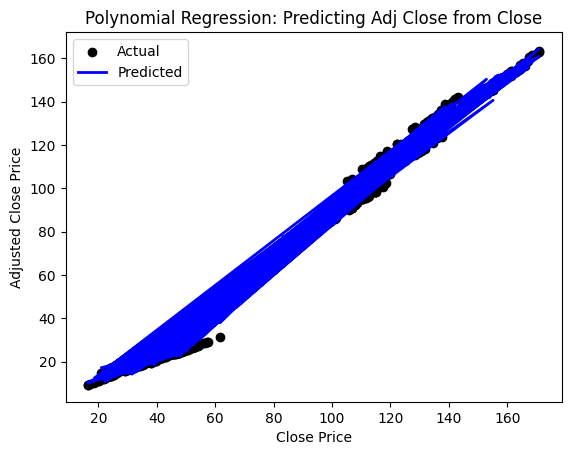

In [246]:
# Visualize the results
plt.scatter(X_test['Close'], y_test, color='black', label='Actual')
plt.plot(X_test['Close'], y_pred, color='blue', linewidth=2, label='Predicted')
plt.xlabel('Close Price')
plt.ylabel('Adjusted Close Price')
plt.title('Polynomial Regression: Predicting Adj Close from Close')
plt.legend()
plt.show()

In [270]:
#Predicted Dividends
new_df2['Predicted Dividends'] = new_df2['Predicted Adj Close'] * (1 - new_df2['Predicted Adj Close'].shift(1) / new_df2['Close'])

In [271]:
new_df2

,Close,Volume,Open,High,Low,Predicted Adj Close,Predicted Dividends
0,105,150000,100,108,98,76.439564,NaN
1,110,200000,105,115,105,86.355046,26.346481
2,95,120000,92,98,90,59.657227,5.428779
3,98,180000,97,101,94,68.102914,26.645455
4,102,160000,99,105,97,73.055232,24.278034


### **Goldman Sachs and JPMorgan Chase**

In [249]:
# Add 'Company' column to each DataFrame
df['Company'] = 'The Goldman Sachs'
df2['Company'] = 'JPMorgan Chase'

In [250]:
combined_df = pd.concat([df, df2])

In [251]:
combined_df.reset_index(drop=True, inplace=True)

In [252]:
combined_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Company
0,2000-01-03,94.187500,94.375000,87.750000,88.312500,65.690536,1822600,NaN,The Goldman Sachs
1,2000-01-04,87.000000,87.500000,82.250000,82.750000,61.552921,1647700,12.689545,The Goldman Sachs
2,2000-01-05,80.875000,81.875000,78.375000,78.875000,58.670509,1516600,12.884884,The Goldman Sachs
3,2000-01-06,78.625000,84.500000,78.625000,82.250000,61.180992,1845100,17.539412,The Goldman Sachs
4,2000-01-07,83.062500,83.187500,79.875000,82.562500,61.413429,1127400,15.904457,The Goldman Sachs
...,...,...,...,...,...,...,...,...,...
11721,2023-04-17,139.949997,140.059998,137.660004,139.830002,139.830002,16050500,1.100006,JPMorgan Chase
11722,2023-04-18,140.270004,141.779999,139.029999,141.399994,141.399994,13760100,1.569992,JPMorgan Chase
11723,2023-04-19,141.229996,141.500000,140.399994,141.220001,141.220001,9158100,-0.179993,JPMorgan Chase
11724,2023-04-20,139.910004,141.429993,139.839996,140.809998,140.809998,10586200,-0.410003,JPMorgan Chase


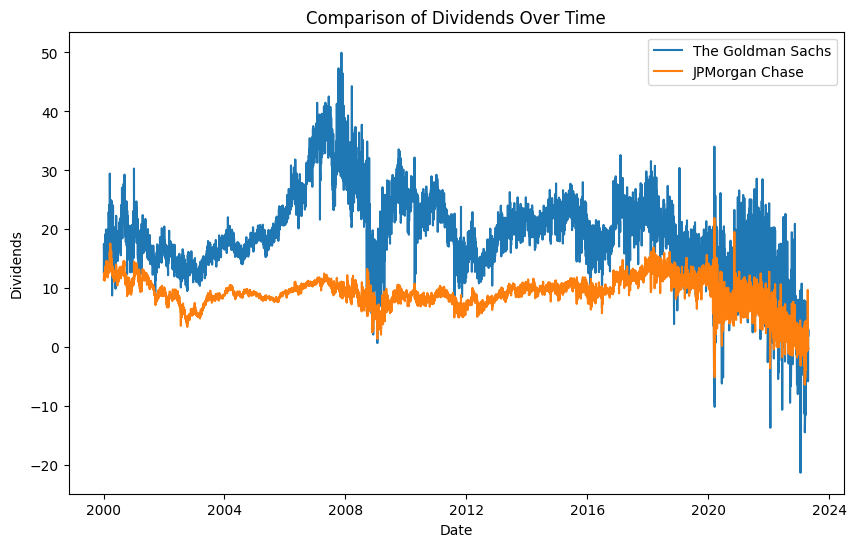

In [253]:
# Plotting dividends over time
plt.figure(figsize=(10, 6))

for company in combined_df['Company'].unique():
    company_data = combined_df[combined_df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Dividends'], label=company)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Dividends')
plt.title('Comparison of Dividends Over Time')
plt.legend()
plt.show()

In [274]:
combined_df['Daily_Return'] = (combined_df['Close'] / combined_df['Open']) - 1

In [275]:
combined_df['Cumulative_Return'] = (1 + combined_df['Daily_Return']).cumprod() - 1

In [276]:
combined_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Company,Daily_Return,Cumulative_Return
0,2000-01-03,94.187500,94.375000,87.750000,88.312500,65.690536,1822600,NaN,The Goldman Sachs,-0.062376,-0.062376
1,2000-01-04,87.000000,87.500000,82.250000,82.750000,61.552921,1647700,12.689545,The Goldman Sachs,-0.048851,-0.108179
2,2000-01-05,80.875000,81.875000,78.375000,78.875000,58.670509,1516600,12.884884,The Goldman Sachs,-0.024730,-0.130233
3,2000-01-06,78.625000,84.500000,78.625000,82.250000,61.180992,1845100,17.539412,The Goldman Sachs,0.046105,-0.090133
4,2000-01-07,83.062500,83.187500,79.875000,82.562500,61.413429,1127400,15.904457,The Goldman Sachs,-0.006020,-0.095610
...,...,...,...,...,...,...,...,...,...,...,...
11721,2023-04-17,139.949997,140.059998,137.660004,139.830002,139.830002,16050500,1.100006,JPMorgan Chase,-0.000857,1.356177
11722,2023-04-18,140.270004,141.779999,139.029999,141.399994,141.399994,13760100,1.569992,JPMorgan Chase,0.008056,1.375158
11723,2023-04-19,141.229996,141.500000,140.399994,141.220001,141.220001,9158100,-0.179993,JPMorgan Chase,-0.000071,1.374990
11724,2023-04-20,139.910004,141.429993,139.839996,140.809998,140.809998,10586200,-0.410003,JPMorgan Chase,0.006433,1.390267
